**<h1 align=center>LETS GROW MORE - Virtual Internship Program - Data Science Internship</h1>**

# <h2> TASK 2 - Beginner Level - Iris Flowers Classification ML Project</h2>

<h3>Name - Viswanath Bodapati<br> Language - Python</h3>

**Iris Flowers Classification Project**


In this project, we will be working on Iris dataset to classify the flowers species, we will follow the whole machine learning project lifecycle. Below is the whole outline that we will be following.

<ol>
  <li>Loading the imporatant libraries</li>
  <li>Loading and understanding the Iris data</li>
  <li>Exploring the data</li>
  <li>Visualizaing the data</li>
  
  <ul>
    <li> Checking if our data is skewed or not using countplot.</li>
    <li> We will plot the grids for every species.</li>
  </ul>
  
  <li>Checking Null Values</li>
  <li>Dividing the data</li>
  <li>Model Development</li>
  
  <ul>
    <li>Using Lr, SVM, Decision Tree, Gradient Boosting</li>
    <li>Calculating loss</li>
    <li>Training on every algorithm</li>
    <li>Choosing the best</li>
  </ul>

  <li>Saving the Model</li>

</ol>

In [ ]:
import numpy as np 
import pandas as pd 

from matplotlib.pyplot import plot as plt 
import seaborn as sns 

# Models 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score

import warnings 
warnings.filterwarnings('ignore')
import joblib

In [ ]:
try :
  data = pd.read_csv('/content/drive/MyDrive/Iris_data (1).csv')
except:
  print('Err')

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
data.shape

(150, 5)

In [ ]:
data["species"].unique()

array([0, 1, 2])

In [ ]:
def to_Categorial(y):
  ans = []
  for i in y:
    if i is 'Iris-Setosa':
      ans.append(0)
    elif i is 'Iris-Versicolour':
      ans.append(1)
    elif i is 'Iris-Virginica':
      ans.append(2)
  return ans

In [ ]:
p = np.array([data['sepal length (cm)'],data['sepal width (cm)'],data['petal length (cm)'],data['petal width (cm)']])
q = np.array(data['species'])

In [ ]:
p, q

(array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
         4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
         5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
         5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
         6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
         6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
         6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
         6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
         6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
         7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
         7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
         6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9],
        [3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
         3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4

In [ ]:
#plt.plot(p[:, 0][q==0], p[:, 1][q==0], 'r.', label = 'Iris-Setosa')
#plt.plot(p[:, 0][q==1], p[:, 1][q==1], 'b.', label = 'Iris-Versicolour')
#plt.plot(p[:, 0][q==2], p[:, 1][q==2], 'g.', label = 'Iris-Virginica')

#plt.legend()
#plt.show()

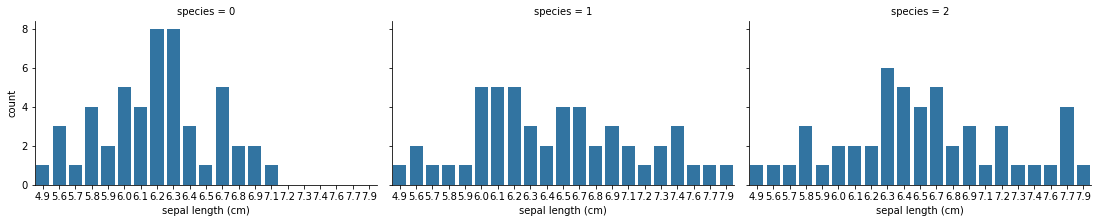

In [ ]:
val = sns.FacetGrid(data,col = 'species',aspect = 1.6,size =3.2)
val.map(sns.countplot,'sepal length (cm)')

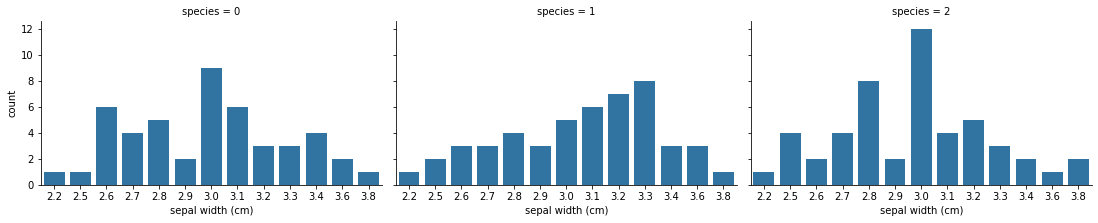

In [ ]:
val = sns.FacetGrid(data,col = 'species',aspect = 1.6,size =3.2)
val.map(sns.countplot,'sepal width (cm)')

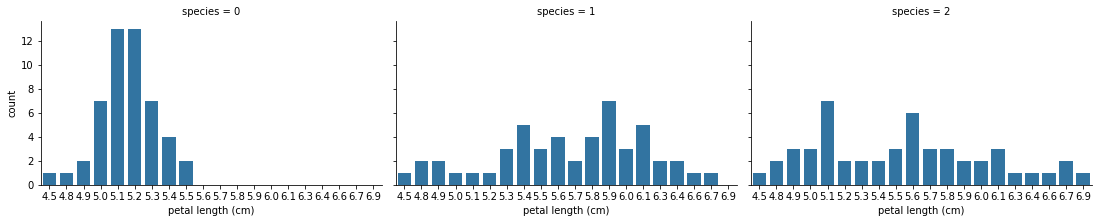

In [ ]:
val = sns.FacetGrid(data,col = 'species',aspect = 1.6,size =3.2)
val.map(sns.countplot,'petal length (cm)')

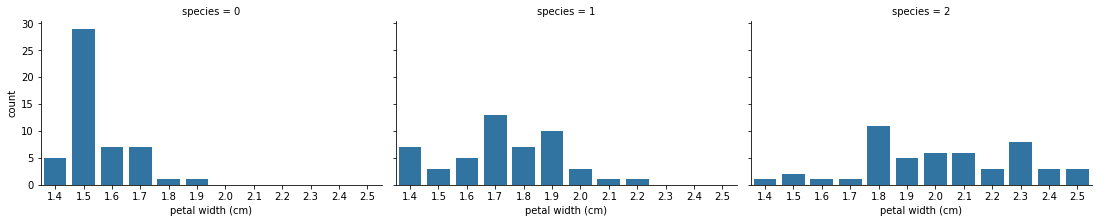

In [ ]:
val = sns.FacetGrid(data,col = 'species',aspect = 1.6,size =3.2)
val.map(sns.countplot,'petal width (cm)')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state=42) 

In [ ]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)

[[6.3 3.3 4.7 1.6]
 [6.5 3.  5.8 2.2]
 [5.6 2.5 3.9 1.1]
 [5.7 2.8 4.5 1.3]
 [6.4 2.8 5.6 2.2]
 [4.7 3.2 1.6 0.2]
 [6.1 3.  4.9 1.8]
 [5.  3.4 1.6 0.4]
 [6.4 2.8 5.6 2.1]
 [7.9 3.8 6.4 2. ]
 [6.7 3.  5.2 2.3]
 [6.7 2.5 5.8 1.8]
 [6.8 3.2 5.9 2.3]
 [4.8 3.  1.4 0.3]
 [4.8 3.1 1.6 0.2]
 [4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [5.4 3.9 1.3 0.4]
 [5.4 3.7 1.5 0.2]
 [5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.

In [ ]:
models = { 
    'GradientBoostingClassifier' : GradientBoostingClassifier(max_depth=1, n_estimators=3, learning_rate=1.0, random_state=42),
    'Logistic_Regression' : LogisticRegression(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42) ,
    'SVC' : SVC(kernel='rbf', gamma=0.5, probability=True),
} 

In [ ]:
def stats(a,b,retur=False):
  pre = precision_score(a,b,average='macro')
  rec = recall_score(a,b,average ='macro')
  avg = accuracy_score(a,b)

  if retur:
    return pre, rec, avg 
  else:
    print(pre)
    print(rec)
    print(avg)

In [ ]:
def evaluating_models(models,x,y):
  for name, model in models.items():
    print(name,':')
    model.fit(x,y)
    stats(y,model.predict(x))
    print('*'*25)

In [ ]:
evaluating_models(models,x_train,y_train)

GradientBoostingClassifier :
0.9716553287981861
0.9701805286911669
0.9703703703703703
*************************
Logistic_Regression :
0.98
0.9772727272727272
0.9777777777777777
*************************
DecisionTreeClassifier :
0.5054945054945055
0.6666666666666666
0.674074074074074
*************************
SVC :
0.98
0.9772727272727272
0.9777777777777777
*************************


In [ ]:
res = GradientBoostingClassifier(max_depth = 3, n_estimators=10 ,learning_rate =0.1, random_state=42)
res.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=10, random_state=42)

In [ ]:
res.predict([[1.2,2.3,1.6,1.0]])

array([0])

In [ ]:
res.predict([[6.7,3.1,5.6,2.4]])

array([2])

In [ ]:
res.predict([[7,3.2,4.7,1.4]])

array([1])

In [ ]:
# Reading Process 
sl = float(input("Enter Sepal Length: "))
sw = float(input("Enter Sepal Width: "))
pl = float(input("Enter Petal Length: "))
pw = float(input("Enter Petal Width: "))

ans = res.predict([[sl,sw,pl,pw]])[0]

if ans == 0:
  print('Iris-Setosa')
elif ans == 1:
  print('Iris-Versicolour')
elif ans ==2 :
  print('Iris-Virginica')
else:
  print("Machine Failed !!")

Enter Sepal Length: 6.1
Enter Sepal Width: 5
Enter Petal Length: 3.2
Enter Petal Width: 4.1
Iris-Virginica
